In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams.update({'font.size': 14})
import seaborn as sns
sns.set_style("darkgrid")

In [34]:
workers = [1, 4, 8, 24, 36, 48, 64]
subinterpreters = [
    [14,14,15],
    [15,15,15,15,19],
    [19,20,23,24,19,23,20,24,24,24],
    [25,28,29,30,32,30,34,38,36,38,40,38,44,43,42,43,44,46,47,50,47,51,44,47,47,45],
    [27,29,30,31,30,32,31,34,35,37,36,40,40,43,45,45,46,52,57,58,54,58,55,56,58,54,59,52,51,48,47,43,40,39,35],
    [29,32,31,33,32,33,36,34,35,40,39,41,43,46,44,48,55,54,51,53,51,57,57,59,62,61,60,59,55,57,61,60,55,54,50,51,50,47,52,43,54,51,41,40,50,42,40],
    [31,32,33,31,33,32,32,35,33,39,42,42,40,49,45,52,51,56,54,60,57,62,60,61,62,57,66,63,62,63,58,59,54,55,59,60,58,58,60,52,59,56,55,60,55,55,55,59,54,59,57,57,51,46,51,50,44,50,46,44,43,40,37,34,41]
]

processes = [
    [0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,1,0,1,1,1,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,2,2,1,2,2,2,1,1,2,1,2,2,2,2,1,2,1,1,1,1,2,2,2,1,1,2,2,1,2,2,1,1,1,1,1,2,1]
]

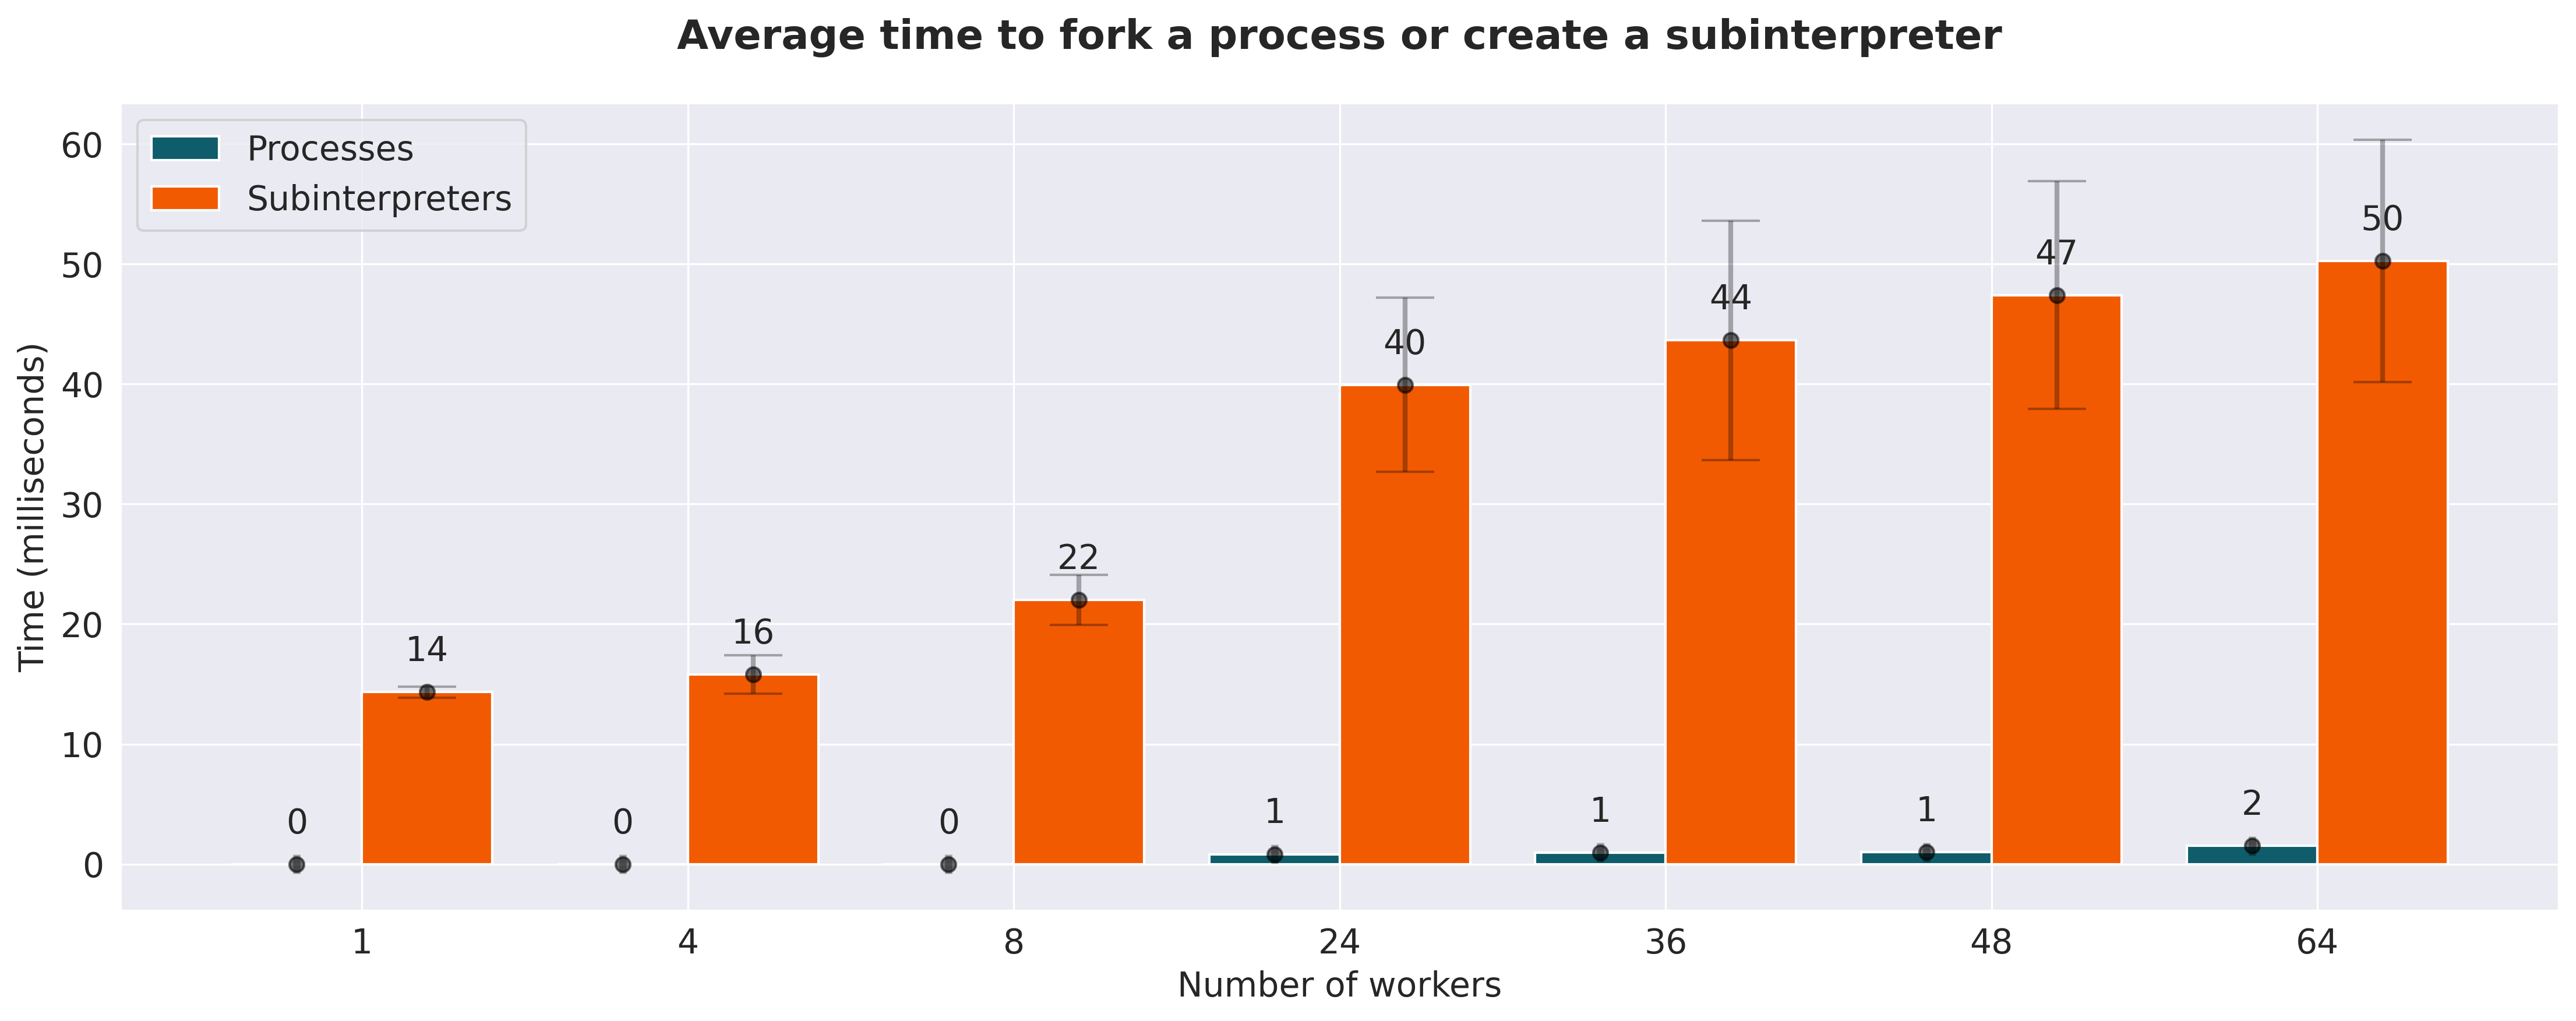

In [35]:
fig, axs = plt.subplots(figsize=(18, 6), dpi=300)
barwidth = 0.4
colors = ["#A0D2DB", "#188FA7", "#0F5C6B", "#F25A02"]
processes_mean = [np.average(lis) for lis in processes]
subinterpreters_mean = [np.average(lis) for lis in subinterpreters]
subinterpreters_var = [np.std(lis) for lis in subinterpreters]
#for nw in x_axis:
x_axis = [i for i in range(len(workers))]
bar1 = plt.bar(x_axis, processes_mean, barwidth, label="Processes", color=colors[2])
bar2 = plt.bar([i + barwidth for i in x_axis], subinterpreters_mean, barwidth, label="Subinterpreters", color=colors[3])
plt.errorbar(x_axis, processes_mean, yerr=0.8, fmt='o', elinewidth=3, capsize=0, color="#00000090", ecolor='#00000050')
plt.errorbar([i + barwidth for i in x_axis], subinterpreters_mean, yerr=subinterpreters_var, fmt='o', elinewidth=2, capsize=12, color="#00000090", ecolor='#00000050')


# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height+2.0, f'{height:.0f}', ha='center', va='bottom')


axs.set_xlabel("Number of workers")
axs.set_ylabel("Time (milliseconds)")
plt.xticks([i + barwidth / 2 for i in x_axis], labels=workers)

plt.title('Average time to fork a process or create a subinterpreter', fontweight="bold", y=1.05)
plt.legend()

#plt.savefig("with-numpy", bbox_inches="tight")
plt.show()